<h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px; color:#000;" align="center">SCHOOL DROPOUT IN SOGAMOSO</h1>
<p style="width: 100%; text-align: center; margin: 0px; padding: 0px; font-size: 24px; color:#000;" align="center">| MODELING Notebook |</p>
<p style="width: 100%; text-align: center; margin: 0px; padding: 0px; font-size: 20px; color:#000;" align="center">Correlation One - DS4A</p>
<p style="text-align:center;">This notebook contains the <b>MODELING</b> of the machine learning algorithms based on the selected features.</p>

## 1. Libraries

In [137]:
# General
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn ligrary
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import (train_test_split, StratifiedKFold,
                                    KFold, cross_validate, HalvingGridSearchCV)
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import (StandardScaler, OneHotEncoder,
                                   OrdinalEncoder, FunctionTransformer)
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (roc_auc_score, confusion_matrix,recall_score,
                             f1_score, precision_score, ConfusionMatrixDisplay,
                             roc_curve, precision_recall_curve)


# from sklearn.metrics import (precision_score, roc_auc_score, recall_score, 
#                              f1_score, fbeta_score, confusion_matrix, roc_curve, 
#                              PrecisionRecallDisplay, ConfusionMatrixDisplay,
#                             precision_recall_curve)

# XGBoost ligrary
from xgboost import XGBClassifier

# Imbalanced-learn ligrary
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

# Own specific functions 
from functions import *

## 2. Importing files

In [2]:
df_students = pd.read_csv("datasets/df_students.csv")

In [3]:
df_analysis(df_students, key_columns=["PER_ID_AÑO"], analysis_type="complete")


Analysis header
--------------------------------------------------------------------------------
- Dataset shape:			 311866 rows and 35 columns
- Total of NaN values:			 183550
- Percentage of NaN:			 1.68 %
- Total of infinite values:		 0
- Total of empty columns:		 0
- Total of empty rows:			 0
- Total of full duplicates rows:	 0
- Unique indexes:			 True
- Memory usage:				 83.3+ MB

- The key(s):	 ['PER_ID_AÑO'] is not present multiple times in the dataframe. 
		 It CAN be used as a primary key.


Detailed analysis
--------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,AÑO,int64,311866,10,0,0.00000,2017.44093,2013.00000,2015.00000,2017.00000,2020.00000,2022.00000,2.88220
1,INSTITUCION,object,311866,76,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,INSTITUCION_ESPECIALIDAD_NO_APLICA,int64,311866,2,0,0.00000,0.38291,0.00000,0.00000,0.00000,1.00000,1.00000,0.48610
32,INSTITUCION_ESPECIALIDAD_INDUSTRIAL,int64,311866,2,0,0.00000,0.63968,0.00000,0.00000,1.00000,1.00000,1.00000,0.48010
31,INSTITUCION_ESPECIALIDAD_COMERCIAL,int64,311866,2,0,0.00000,0.00878,0.00000,0.00000,0.00000,0.00000,1.00000,0.09327
30,INSTITUCION_ESPECIALIDAD_AGROPECUARIO,int64,311866,2,0,0.00000,0.07492,0.00000,0.00000,0.00000,0.00000,1.00000,0.26327
29,INSTITUCION_ESPECIALIDAD_ACADÉMICA,int64,311866,2,0,0.00000,0.90453,0.00000,1.00000,1.00000,1.00000,1.00000,0.29386
28,INSTITUCION_NIVEL_PRIMERA_INFANCIA,int64,311866,2,0,0.00000,0.10307,0.00000,0.00000,0.00000,0.00000,1.00000,0.30405
27,INSTITUCION_NIVEL_PREESCOLAR,int64,311866,2,0,0.00000,0.96091,0.00000,1.00000,1.00000,1.00000,1.00000,0.19382
26,INSTITUCION_NIVEL_MEDIA,int64,311866,2,0,0.00000,0.94293,0.00000,1.00000,1.00000,1.00000,1.00000,0.23198


## 3. Analyzing target variable

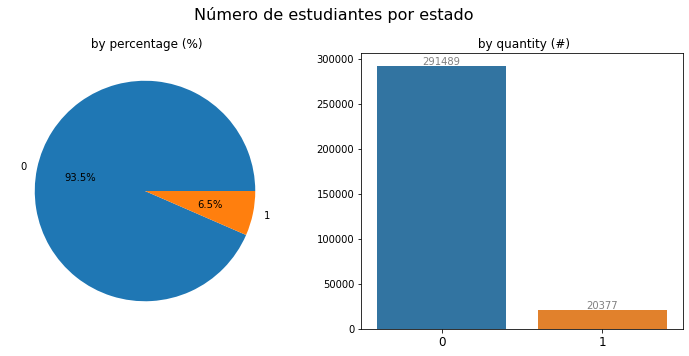

In [4]:
barplot_and_pie(df_students["ESTADO"], "Número de estudiantes por estado", "")

<div class="alert alert-block alert-warning">
    <p><b>Observations</b></p>
    <p>Based on the plot, we can say that we are facing an imbalanced classification problem</p>

</div>

## 4. Splitting data

First of all, we are going to separate the data to predict (2022) from the data to do the training (from 2013 to 2021)

In [5]:
df_students_2022 = df_students[df_students["AÑO"]==2022].copy()
df_students_2022["ESTADO"] = np.NaN

df_students = df_students[df_students["AÑO"]!=2022].copy()

Now, we are let's identify the training columns in the dataset

In [6]:
NOT_TRAINING_COLUMNS = [
    "ESTADO", "AÑO", "PER_ID_AÑO", "PER_ID", "INSTITUCION_LATITUDE", "INSTITUCION_LONGITUD",
]

TRAINING_COLUMNS = [col for col in df_students if col not in NOT_TRAINING_COLUMNS]

Let's proced to split the data

In [7]:
X = df_students[TRAINING_COLUMNS].copy()

In [8]:
y_target = df_students.loc[:, "ESTADO"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.2,
                                                    stratify=y_target, random_state=42)

In [10]:
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print(30*"-")
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

X_train: (224949, 29)
y_train: (224949,)
------------------------------
X_test: (56238, 29)
y_test: (56238,)


## 5. Data preprocessing

In [11]:
def boolean_transformation(X):
    return X.astype(int)

In [12]:
X_train.columns

Index(['INSTITUCION', 'EDAD', 'GENERO', 'GRADO_COD', 'JORNADA', 'ESTRATO',
       'PAIS_ORIGEN', 'DISCAPACIDAD', 'SRPA', 'INSTITUCION_SECTOR',
       'INSTITUCION_MODELO', 'INSTITUCION_APOYO_ACADEMICO_ESPECIAL',
       'INSTITUCION_ZONA', 'INSTITUCION_CARACTER',
       'INSTITUCION_NUMERO_DE_SEDES', 'INSTITUCION_ESTADO',
       'INSTITUCION_PRESTADOR_DE_SERVICIO', 'INSTITUCION_TAMAÑO',
       'INSTITUCION_NIVEL_BASICA_PRIMARIA',
       'INSTITUCION_NIVEL_SECUNDARIA_PRIMARIA', 'INSTITUCION_NIVEL_MEDIA',
       'INSTITUCION_NIVEL_PREESCOLAR', 'INSTITUCION_NIVEL_PRIMERA_INFANCIA',
       'INSTITUCION_ESPECIALIDAD_ACADÉMICA',
       'INSTITUCION_ESPECIALIDAD_AGROPECUARIO',
       'INSTITUCION_ESPECIALIDAD_COMERCIAL',
       'INSTITUCION_ESPECIALIDAD_INDUSTRIAL',
       'INSTITUCION_ESPECIALIDAD_NO_APLICA', 'INSTITUCION_ESPECIALIDAD_OTRO'],
      dtype='object')

In [13]:
CATEGORICAL_FEATURES = [
    "INSTITUCION", "GENERO", "JORNADA", "PAIS_ORIGEN", "DISCAPACIDAD", "SRPA", "INSTITUCION_SECTOR",
    "INSTITUCION_MODELO", "INSTITUCION_APOYO_ACADEMICO_ESPECIAL", "INSTITUCION_ZONA", "INSTITUCION_CARACTER",
    "INSTITUCION_ESTADO", "INSTITUCION_PRESTADOR_DE_SERVICIO", 
]
ORDINAL_FEATURES = [
    "GRADO_COD", "ESTRATO", "INSTITUCION_TAMAÑO"
]
NUMERICAL_FEATURES = [
    "EDAD", "INSTITUCION_NUMERO_DE_SEDES"
]
BOOLEAN_FEATURES = [
    "INSTITUCION_NIVEL_BASICA_PRIMARIA", "INSTITUCION_NIVEL_SECUNDARIA_PRIMARIA", "INSTITUCION_NIVEL_MEDIA",
    "INSTITUCION_NIVEL_PREESCOLAR", "INSTITUCION_NIVEL_PRIMERA_INFANCIA", "INSTITUCION_ESPECIALIDAD_ACADÉMICA", 
    "INSTITUCION_ESPECIALIDAD_AGROPECUARIO", "INSTITUCION_ESPECIALIDAD_COMERCIAL", 
    "INSTITUCION_ESPECIALIDAD_INDUSTRIAL", "INSTITUCION_ESPECIALIDAD_NO_APLICA",
    "INSTITUCION_ESPECIALIDAD_OTRO"
]

In [14]:
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[
    [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0],
    ['ESTRATO 0', 'ESTRATO 1', 'ESTRATO 2', 'ESTRATO 3', 'ESTRATO 4', 'ESTRATO 5', 'ESTRATO 6'],
    ['Pequeña', 'Mediana',  'Grande']
]))

numerical_pipeline = make_pipeline(StandardScaler())

boolean_pipeline = make_pipeline(FunctionTransformer(boolean_transformation))

In [15]:
preprocessor = make_column_transformer(
    (categorical_pipeline, CATEGORICAL_FEATURES),
    (ordinal_pipeline, ORDINAL_FEATURES),
    (numerical_pipeline, NUMERICAL_FEATURES),
    (boolean_pipeline, BOOLEAN_FEATURES)
)

## 6. Modelisation initial

we are going to use three models

- Logistic Regression
- Random Forest
- Gradient Boosting
- XGBoost 

Also, we are going to use a Dummy Classifier as a baseline to compare the models

We are going to use Stratified K-Folds cross-validator to ensure that each fold of dataset has the same proportion of observations with a given label

In [16]:
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

Metrics to use.

In [18]:
scorings = ["roc_auc", "recall", "f1"]

In [17]:
classifiers = {
    "Dummy Classifier" : DummyClassifier(),
    "Logistic Regressions" : LogisticRegressionCV(max_iter=3000),
    "Random Forest" : RandomForestClassifier(),
    "Gradient Boosting" : GradientBoostingClassifier(),
    "XGBoost" : XGBClassifier()
}

In [19]:
# List of metrics results for each models 
LIST_MODEL, LIST_RECALL, LIST_ROC_AUC, LIST_F1, LIST_DURATION  = ([] for i in range(5))

for key, model in classifiers.items():

    start_time_model = timeit.default_timer()
    
    clf = make_pipeline(preprocessor, model)
    
    scores = cross_validate(clf, X_train, y_train, 
                            cv=stratified_kfold, scoring=scorings,  
                            n_jobs=-1)
    
    end_time_model =  round(timeit.default_timer() - start_time_model, 3)
    
    # Adding results into LIST
    LIST_MODEL.append(key)
    LIST_RECALL.append(round(scores.get("test_recall").mean(), 3))
    LIST_ROC_AUC.append(round(scores.get("test_roc_auc").mean(), 3))
    LIST_F1.append(round(scores.get("test_f1").mean(), 3))
    LIST_DURATION.append(end_time_model)

In [20]:
df_initial_models = pd.DataFrame({
    "Model" : LIST_MODEL,
    "ROC-AUC" : LIST_ROC_AUC,
    "Recall" : LIST_RECALL,    
    "F1" : LIST_F1,
    "Duration" : LIST_DURATION,
})

# transforming duration to minutes
df_initial_models["Duration"] = round(df_initial_models["Duration"]/60, 1)

df_initial_models

,Model,ROC-AUC,Recall,F1,Duration
0,Dummy Classifier,0.500,0.000,0.000,0.1
1,Logistic Regressions,0.695,0.006,0.011,3.8
2,Random Forest,0.685,0.175,0.244,4.5
3,Gradient Boosting,0.745,0.056,0.104,0.7
4,XGBoost,0.764,0.124,0.209,0.4


In [21]:
df_models_metrics_reduced = pd.melt(df_initial_models, id_vars="Model", var_name="Metric", value_name="Value")
df_models_metrics_reduced.head()

,Model,Metric,Value
0,Dummy Classifier,ROC-AUC,0.500
1,Logistic Regressions,ROC-AUC,0.695
2,Random Forest,ROC-AUC,0.685
3,Gradient Boosting,ROC-AUC,0.745
4,XGBoost,ROC-AUC,0.764


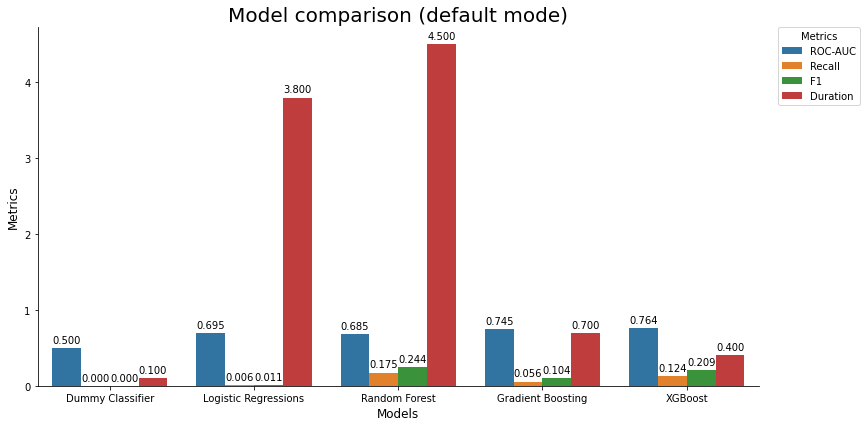

In [22]:
fig, ax1 = plt.subplots(figsize=(12, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_models_metrics_reduced, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Model comparison (default mode)", size=20)
plt.legend(bbox_to_anchor=(1.14, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Models", size=12)
plt.ylabel("Metrics", size=12)
sns.despine(fig)

<div class="admonition warning alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Observations / Conclusions</p>
<p class="last">Using only default mode, all models have obtained better result compared to Dummy Classifier.<br>In addition, the XGBoost has obtained the best result in less time
</p>
</div>

## 7. Hyperparameters Tuning

For reasons of processing cost, we are going to tune the models with a subsample of the data.
Done this, we will proceed to continue the modeling with the parameters obtained.

### 7.1. Subsample of the data

In [34]:
df_subsample = df_students.copy()
df_subsample = df_subsample.sample(frac=0.4)

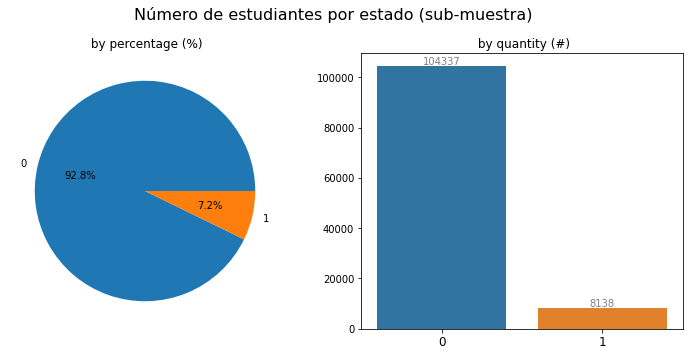

In [35]:
barplot_and_pie(df_subsample["ESTADO"], "Número de estudiantes por estado (sub-muestra)", "")

Now, we are going to split the subsample of the data to tune the models

In [36]:
X_ss = df_subsample[TRAINING_COLUMNS]

In [37]:
y_target_ss = df_subsample.loc[:,"ESTADO"]

In [38]:
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(X_ss, y_target_ss, test_size=0.20, stratify=y_target_ss, random_state=42)

In [39]:
print("X_train_ss: {}".format(X_train_ss.shape))
print("y_train_ss: {}".format(y_train_ss.shape))
print(30*"-")
print("X_test_ss: {}".format(X_test_ss.shape))
print("y_test_ss: {}".format(y_test_ss.shape))

X_train_ss: (89980, 29)
y_train_ss: (89980,)
------------------------------
X_test_ss: (22495, 29)
y_test_ss: (22495,)


### 7.2. Logistic Regresion

In [48]:
lr = LogisticRegressionCV()
clr = make_pipeline(preprocessor, lr)

sorted(clr.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__ordinalencoder',
 'columntransformer__pipeline-2__ordinalencoder__categories',
 'columntransformer__pipeline-2__ordinalencoder__dtype',
 'columntransformer__pipeline-2__ordinalencoder__encoded_missing_value'

In [59]:
param_grid = {
    "logisticregressioncv__max_iter" : [2000, 3000, 4000, 5000, 6000],
    "logisticregressioncv__solver"  : ["newton-cg", "lbfgs", "liblinear"],
}

In [60]:
search = HalvingGridSearchCV(clr, param_grid, scoring="roc_auc", 
                             cv=stratified_kfold, n_jobs=-1)

In [61]:
search.fit(X_train_ss, y_train_ss)

HalvingGridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                    estimator=Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('pipeline-1',
                                                                                Pipeline(steps=[('onehotencoder',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                ['INSTITUCION',
                                                                                 'GENERO',
                                                                                 'JORNADA',
                                                                                 'PAIS_ORIGEN',
                                                                                 'DISCAPACIDAD',
                                                                                 'SRPA',
                                                                                 'INSTITUCION_SECTOR',
                                                                                 'INSTITUCIO...
                                                                                 'INSTITUCION_ESPECIALIDAD_COMERCIAL',
                                                                                 'INSTITUCION_ESPECIALIDAD_INDUSTRIAL',
                                                                                 'INSTITUCION_ESPECIALIDAD_NO_APLICA',
                                                                                 'INSTITUCION_ESPECIALIDAD_OTRO'])])),
                                              ('logisticregressioncv',
                                               LogisticRegressionCV())]),
                    n_jobs=-1,
                    param_grid={'logisticregressioncv__max_iter': [2000, 3000,
                                                                   4000, 5000,
                                                                   6000],
                                'logisticregressioncv__solver': ['newton-cg',
                                                                 'lbfgs',
                                                                 'liblinear']},
                    scoring='roc_auc')

In [65]:
search.best_params_

{'logisticregressioncv__max_iter': 5000,
 'logisticregressioncv__solver': 'lbfgs'}

In [66]:
lr_parameters = search.best_params_

In [63]:
search.best_score_

0.640686881291492

### 7.3. Random Forest

In [67]:
rfc = RandomForestClassifier()
clr = make_pipeline(preprocessor, rfc)

sorted(clr.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__ordinalencoder',
 'columntransformer__pipeline-2__ordinalencoder__categories',
 'columntransformer__pipeline-2__ordinalencoder__dtype',
 'columntransformer__pipeline-2__ordinalencoder__encoded_missing_value'

In [68]:
param_grid = {
    "randomforestclassifier__n_estimators" : np.arange(500, 900, 100),
    "randomforestclassifier__max_depth" : np.arange(20, 30, 2)
}

In [69]:
search = HalvingGridSearchCV(clr, param_grid, scoring="roc_auc", 
                             cv=stratified_kfold, n_jobs=-1)

In [70]:
search.fit(X_train_ss, y_train_ss)

HalvingGridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                    estimator=Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('pipeline-1',
                                                                                Pipeline(steps=[('onehotencoder',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                ['INSTITUCION',
                                                                                 'GENERO',
                                                                                 'JORNADA',
                                                                                 'PAIS_ORIGEN',
                                                                                 'DISCAPACIDAD',
                                                                                 'SRPA',
                                                                                 'INSTITUCION_SECTOR',
                                                                                 'INSTITUCIO...
                                                                                 'INSTITUCION_ESPECIALIDAD_COMERCIAL',
                                                                                 'INSTITUCION_ESPECIALIDAD_INDUSTRIAL',
                                                                                 'INSTITUCION_ESPECIALIDAD_NO_APLICA',
                                                                                 'INSTITUCION_ESPECIALIDAD_OTRO'])])),
                                              ('randomforestclassifier',
                                               RandomForestClassifier())]),
                    n_jobs=-1,
                    param_grid={'randomforestclassifier__max_depth': array([20, 22, 24, 26, 28]),
                                'randomforestclassifier__n_estimators': array([500, 600, 700, 800])},
                    scoring='roc_auc')

In [71]:
search.best_params_

{'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__n_estimators': 800}

In [72]:
rfm_parameters = search.best_params_

In [73]:
search.best_score_

0.7352077988945265

### 7.4. Gradient Boosting

In [74]:
gbc = GradientBoostingClassifier()
clr = make_pipeline(preprocessor, gbc)

sorted(clr.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__ordinalencoder',
 'columntransformer__pipeline-2__ordinalencoder__categories',
 'columntransformer__pipeline-2__ordinalencoder__dtype',
 'columntransformer__pipeline-2__ordinalencoder__encoded_missing_value'

In [75]:
param_grid = {
    "gradientboostingclassifier__n_estimators" : np.arange(5, 10, 500),
    "gradientboostingclassifier__max_depth": np.arange( 3, 5, 15),
    "gradientboostingclassifier__learning_rate": np.arange(0.01, 0.1, 10)
}

In [76]:
search = HalvingGridSearchCV(clr, param_grid, scoring="roc_auc", 
                             cv=stratified_kfold, n_jobs=-1)

In [77]:
search.fit(X_train_ss, y_train_ss)

HalvingGridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                    estimator=Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('pipeline-1',
                                                                                Pipeline(steps=[('onehotencoder',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                ['INSTITUCION',
                                                                                 'GENERO',
                                                                                 'JORNADA',
                                                                                 'PAIS_ORIGEN',
                                                                                 'DISCAPACIDAD',
                                                                                 'SRPA',
                                                                                 'INSTITUCION_SECTOR',
                                                                                 'INSTITUCIO...
                                                                                 'INSTITUCION_ESPECIALIDAD_INDUSTRIAL',
                                                                                 'INSTITUCION_ESPECIALIDAD_NO_APLICA',
                                                                                 'INSTITUCION_ESPECIALIDAD_OTRO'])])),
                                              ('gradientboostingclassifier',
                                               GradientBoostingClassifier())]),
                    n_jobs=-1,
                    param_grid={'gradientboostingclassifier__learning_rate': array([0.01]),
                                'gradientboostingclassifier__max_depth': array([3]),
                                'gradientboostingclassifier__n_estimators': array([5])},
                    scoring='roc_auc')

In [78]:
search.best_params_

{'gradientboostingclassifier__learning_rate': 0.01,
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__n_estimators': 5}

In [79]:
gbc_parameters = search.best_params_

In [80]:
search.best_score_

0.6665163447233509

### 7.5. XGBoost

In [81]:
xbgc = XGBClassifier()
clr = make_pipeline(preprocessor, xbgc)

sorted(clr.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__ordinalencoder',
 'columntransformer__pipeline-2__ordinalencoder__categories',
 'columntransformer__pipeline-2__ordinalencoder__dtype',
 'columntransformer__pipeline-2__ordinalencoder__encoded_missing_value'

In [82]:
param_grid = {
    "xgbclassifier__min_child_weight" : [1, 5, 10],
    "xgbclassifier__gamma" : [0.5, 1, 1.5, 2, 5],
    "xgbclassifier__subsample" : [0.6, 0.8, 1.0],
    "xgbclassifier__colsample_bytree" : [0.6, 0.8, 1.0],
    "xgbclassifier__max_depth" : np.arange( 3, 5, 15)
}

In [83]:
search = HalvingGridSearchCV(clr, param_grid, scoring="roc_auc", 
                             cv=stratified_kfold, n_jobs=-1)

In [84]:
search.fit(X_train_ss, y_train_ss)

HalvingGridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                    estimator=Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('pipeline-1',
                                                                                Pipeline(steps=[('onehotencoder',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                ['INSTITUCION',
                                                                                 'GENERO',
                                                                                 'JORNADA',
                                                                                 'PAIS_ORIGEN',
                                                                                 'DISCAPACIDAD',
                                                                                 'SRPA',
                                                                                 'INSTITUCION_SECTOR',
                                                                                 'INSTITUCIO...
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=None, ...))]),
                    n_jobs=-1,
                    param_grid={'xgbclassifier__colsample_bytree': [0.6, 0.8,
                                                                    1.0],
                                'xgbclassifier__gamma': [0.5, 1, 1.5, 2, 5],
                                'xgbclassifier__max_depth': array([3]),
                                'xgbclassifier__min_child_weight': [1, 5, 10],
                                'xgbclassifier__subsample': [0.6, 0.8, 1.0]},
                    scoring='roc_auc')

In [85]:
search.best_params_

{'xgbclassifier__colsample_bytree': 0.8,
 'xgbclassifier__gamma': 5,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__min_child_weight': 1,
 'xgbclassifier__subsample': 0.8}

In [86]:
xbgc_parameters = search.best_params_

In [87]:
search.best_score_

0.7518060453543275

## 8. Custom evaluations

### 8.1. Custom Score

We are going to penalize False Negative that are students dropped out, and they were predicted incorrectly.<br> Due to that, we are going to define a Custom Score.

In [124]:
def custom_score(y_test, y_pred):
    """
    Method used to calculate a score based on the penalization of False Negatives.

    Parameters:
    -----------------
        y_test (series): True values
        y_pred (series): Predicted values
        threshold (float): Threshold value to use
        
    Returns:
    -----------------
        Score. (float): Score obtained based on the rules defined to measure. 
    """
    
    TN_rate = 1        # Students that do not drop out and were predicted correctly
    TP_rate = 1        # Students that dropped out and were predicted correctly
    FP_rate = -1       # Students that do not drop out and were predicted incorrectly
    FN_rate = -10       # Students that dropped out and were were predicted incorrectly
    
    # Getting all values based on confusion matrix
    (TN, FP, FN, TP) = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()

    # Total of default and not default cases
    total_not_default = TN + FP     # Not drop out cases
    total_default = TP + FN         # Drop out cases 
    
    gain_total = TN*TN_rate + TP*TP_rate + FP*FP_rate + FN*FN_rate
    gain_maximun = total_not_default*TN_rate + total_default*TP_rate
    gain_minumun = total_not_default*TN_rate + total_default*FN_rate
    
    # normalize to get score between 0 (baseline) and 1
    score = (gain_total - gain_minumun) / (gain_maximun - gain_minumun)
    
    return score

### 8.2. Threshold selection

Based on the probability predictions and Custom Score, we are going to identify the best treshold to mesure our models.

In [122]:
def threshold_selection(y_test, y_prob):
    """
    Method used to calculate the threshold based on the Custom Score.

    Parameters:
    -----------------
        df (pandas.DataFrame): Dataset to analyze
        y_test (1d array-like): True values
        y_prob (1d array-like): Probabilite values predicted
        
    Returns:
    -----------------
        threshold (float) : Best threshold value
        Threshold (image) : Plot the threshold and the best score
    """
    
    thresholds = np.arange(0, 1, 0.001)
    scores = []
    
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype("int")
        score = custom_score(y_test, y_pred)
        scores.append(score)
        
    scores = np.asarray(scores)
    ix = np.argmax(scores)
    
    best_threshold, best_score = (thresholds[ix], round(scores[ix], 3))
    
    print("Best results")
    print("- Best Threshold:\t", best_threshold)
    print("- Best Score:\t\t", best_score)
    print("\n")
    
    plt.subplots(1, figsize=(6, 5))
    plt.plot(thresholds, scores, lw=1)
    plt.axvline(best_threshold, ls="--", lw=1, c="r")
    plt.title("Threshold")
    plt.xlabel("proba threshold")
    plt.ylabel("Score performed")
    plt.show()
    
    return best_threshold

## 9. Modelisation using class_weight

At this point, we are going to use the parameter class_weight to affect the computation of the model to penalize differently a false classification from the minority and majority class

### 9.1. Logistic Regresion

In [108]:
# delete string corresponding to pipeline's name
lr_parameters = {k.replace("logisticregressioncv__", "") : v for k, v in lr_parameters.items()}

lr_cw = LogisticRegressionCV(**lr_parameters,
                             class_weight="balanced",
                             random_state=42,
                             n_jobs=-1)

clf_lr_cw = make_pipeline(preprocessor, lr_cw)

Executing the model with the complete dataset

In [109]:
start_time_model = timeit.default_timer()

clf_lr_cw.fit(X_train, y_train)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

Predict the probabilities

In [111]:
y_prob = clf_lr_cw.predict_proba(X_test)
y_prob = y_prob[:, 1]

Let's selet the threshold based on the best parameters

Best results
- Best Threshold:	 0.671
- Best Score:		 0.19




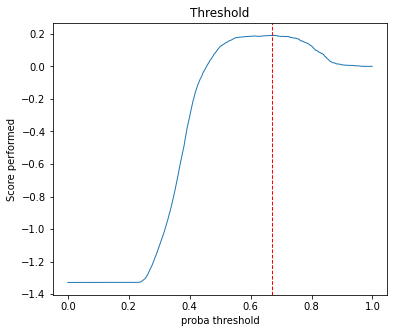

In [125]:
threshold = threshold_selection(y_test, y_prob)

Making the predictions based on the probabilities and threshold

In [126]:
y_pred = (y_prob >= threshold).astype(int)

Now, we can get the metrics

In [127]:
roc_auc = round(roc_auc_score(y_test, y_prob), 3)
recall_0, recall_1 = recall_score(y_test, y_pred, average=None).round(3)
f1 = round(f1_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)

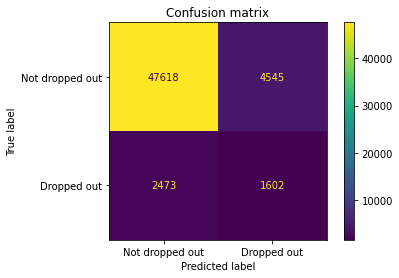

In [131]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                                  display_labels=["Not dropped out", 
                                                                  "Dropped out"])
_ = display.ax_.set_title("Confusion matrix")

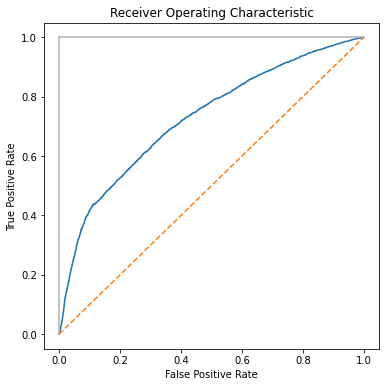

In [135]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

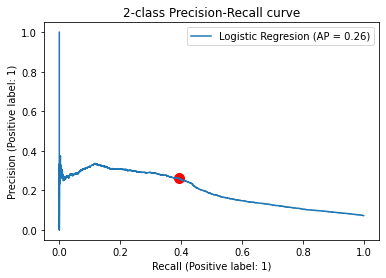

In [139]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1, precision, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Logistic Regresion (AP = %.2f)"% (precision)], loc=0)
plt.show()

Let's save the metrics to compare against the others models

In [141]:
df_models_metrics_complete = pd.DataFrame({
    "Model" : ["Class weight - Logistic Regresion"],
    "Threshold" : threshold,
    "ROC-AUC" : roc_auc,    
    "Recall - 0" : recall_0,
    "Recall - 1" : recall_1,
    "Precision" : precision,
    "F1" : f1,    
    "Duration" : round(end_time_model/60, 1)
})

df_models_metrics_complete

,Model,Threshold,ROC-AUC,Recall - 0,Recall - 1,Precision,F1,Duration
0,Class weight - Logistic Regresion,0.671,0.727,0.913,0.393,0.261,0.313,1.9


### 9.2. Random Forest

In [145]:
# delete string corresponding to pipeline's name
rfm_parameters = {k.replace("randomforestclassifier__", "") : v for k, v in rfm_parameters.items()}

rfc_cw = RandomForestClassifier(**rfm_parameters,
                                class_weight="balanced",
                                random_state=42,
                                n_jobs=-1)

clf_rfc_cw = make_pipeline(preprocessor, rfc_cw)

Executing the model with the complete dataset

In [146]:
start_time_model = timeit.default_timer()

clf_rfc_cw.fit(X_train, y_train)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

Predict the probabilities

In [147]:
y_prob = clf_rfc_cw.predict_proba(X_test)
y_prob = y_prob[:, 1]

Let's selet the threshold based on the best parameters

Best results
- Best Threshold:	 0.5760000000000001
- Best Score:		 0.214




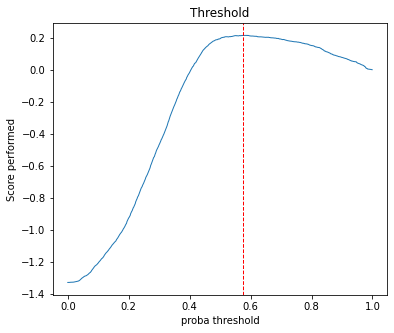

In [148]:
threshold = threshold_selection(y_test, y_prob)

Making the predictions based on the probabilities and threshold

In [149]:
y_pred = (y_prob >= threshold).astype(int)

Now, we can get the metrics

In [150]:
roc_auc = round(roc_auc_score(y_test, y_prob), 3)
recall_0, recall_1 = recall_score(y_test, y_pred, average=None).round(3)
f1 = round(f1_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)

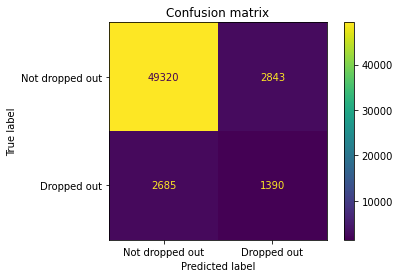

In [151]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                                  display_labels=["Not dropped out", 
                                                                  "Dropped out"])
_ = display.ax_.set_title("Confusion matrix")

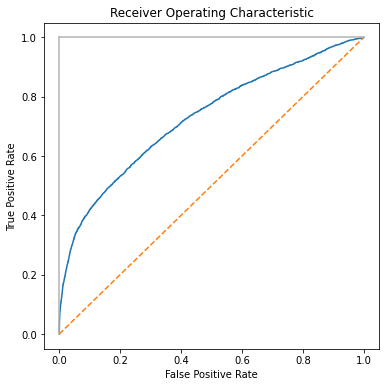

In [152]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

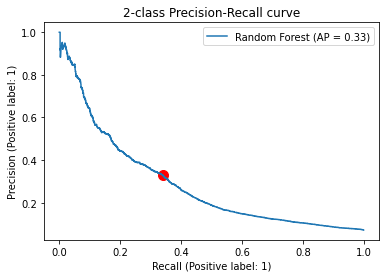

In [153]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1, precision, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Random Forest (AP = %.2f)"% (precision)], loc=0)
plt.show()

Let's save the metrics to compare against the others models

In [154]:
df_temp  = pd.DataFrame({
    "Model" : ["Class weight - Random Forest"],
    "Threshold" : threshold,
    "ROC-AUC" : roc_auc,    
    "Recall - 0" : recall_0,
    "Recall - 1" : recall_1,
    "Precision" : precision,
    "F1" : f1,    
    "Duration" : round(end_time_model/60, 1)
})

df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True)

,Model,Threshold,ROC-AUC,Recall - 0,Recall - 1,Precision,F1,Duration
0,Class weight - Logistic Regresion,0.671,0.727,0.913,0.393,0.261,0.313,1.9
1,Class weight - Logistic Regresion,0.576,0.728,0.945,0.341,0.328,0.335,3.9


### 9.3. Gradient Boosting

Unfortunately, Gradient Boosting (GBM) doesn't have a parameters call `class_weight` to treat with Imbalanced Class.<br>

But, GBM deals with class imbalance by constructing successive training sets based on incorrectly classified examples

In [158]:
# delete string corresponding to pipeline's name
gbc_parameters = {k.replace("gradientboostingclassifier__", "") : v for k, v in gbc_parameters.items()}

gbc_cw = GradientBoostingClassifier(**gbc_parameters,
                                    validation_fraction=0.2, 
                                    n_iter_no_change=5,
                                    random_state=42)

clf_gbc_cw = make_pipeline(preprocessor, gbc_cw)

Executing the model with the complete dataset

In [159]:
start_time_model = timeit.default_timer()

clf_gbc_cw.fit(X_train, y_train)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

Predict the probabilities

In [160]:
y_prob = clf_gbc_cw.predict_proba(X_test)
y_prob = y_prob[:, 1]

Let's selet the threshold based on the best parameters

Best results
- Best Threshold:	 0.076
- Best Score:		 0.208




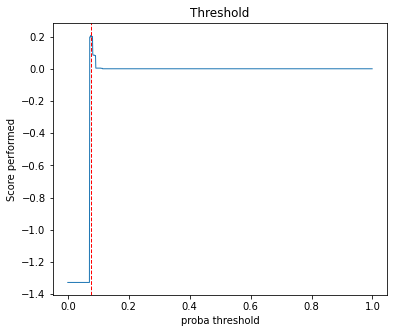

In [161]:
threshold = threshold_selection(y_test, y_prob)

Making the predictions based on the probabilities and threshold

In [162]:
y_pred = (y_prob >= threshold).astype(int)

Now, we can get the metrics

In [164]:
roc_auc = round(roc_auc_score(y_test, y_prob), 3)
recall_0, recall_1 = recall_score(y_test, y_pred, average=None).round(3)
f1 = round(f1_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)

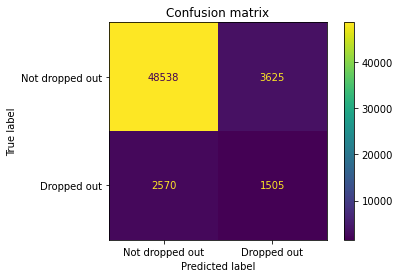

In [165]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                                  display_labels=["Not dropped out", 
                                                                  "Dropped out"])
_ = display.ax_.set_title("Confusion matrix")

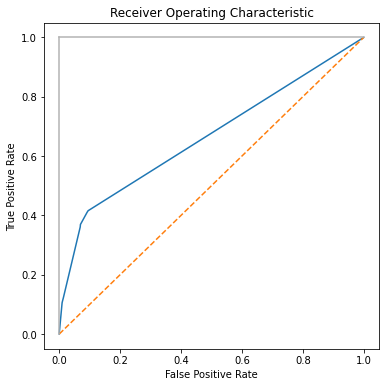

In [166]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

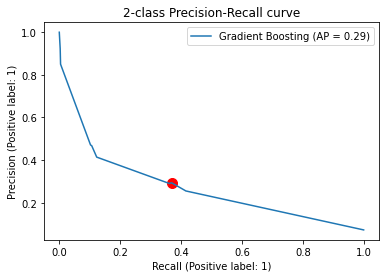

In [168]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1, precision, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Gradient Boosting (AP = %.2f)"% (precision)], loc=0)
plt.show()

Let's save the metrics to compare against the others models

In [169]:
df_temp  = pd.DataFrame({
    "Model" : ["Tuned - Gradient Boosting"],
    "Threshold" : threshold,
    "ROC-AUC" : roc_auc,    
    "Recall - 0" : recall_0,
    "Recall - 1" : recall_1,
    "Precision" : precision,
    "F1" : f1,    
    "Duration" : round(end_time_model/60, 1)
})

df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True)

,Model,Threshold,ROC-AUC,Recall - 0,Recall - 1,Precision,F1,Duration
0,Class weight - Logistic Regresion,0.671,0.727,0.913,0.393,0.261,0.313,1.9
1,Class weight - Logistic Regresion,0.576,0.728,0.945,0.341,0.328,0.335,3.9
2,Tuned - Gradient Boosting,0.076,0.665,0.931,0.369,0.293,0.327,0.1


## 6. Random Forest

In [ ]:
rfm = RandomForestClassifier(class_weight="balanced")

In [ ]:
clf = make_pipeline(preprocessor, rfm)

In [ ]:
sorted(clf.get_params().keys())

In [ ]:
param_grid = {
    "randomforestclassifier__n_estimators" : np.arange(500, 1000, 100),
    "randomforestclassifier__max_depth" : np.arange(20, 30, 2)
}

We are going to use Stratified K-Folds cross-validator to ensure that each fold of dataset has the same proportion of observations with a given label

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
search = HalvingGridSearchCV(clf, param_grid, scoring="roc_auc",
                             cv=stratified_kfold, n_jobs=-2)

In [ ]:
search.fit(X_train, y_train)

In [ ]:
search.best_params_

In [ ]:
search.best_score_

In [ ]:
rfm_test = RandomForestClassifier(max_depth=20, n_estimators=600,
                                  class_weight="balanced",
                                  random_state=42,
                                  n_jobs=-1)

In [ ]:
clf_test = make_pipeline(preprocessor, rfm_test)

In [ ]:
clf_test.fit(X_train, y_train)

In [ ]:
roc_auc_score(y_test, clf_test.predict(X_test))

In [ ]:
imbpipeline_clf = imbpipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE()),
    ("rfm_imblearn", RandomForestClassifier(max_depth=20, 
                                            n_estimators=600,
                                            random_state=42,
                                            n_jobs=-1)
    )
])

In [ ]:
imbpipeline_clf.fit(X_train, y_train)

In [ ]:
roc_auc_score(y_test, imbpipeline_clf.predict(X_test))